In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)
train_y.shape

(60000, 28, 28) (60000,)


(60000,)

label is 3


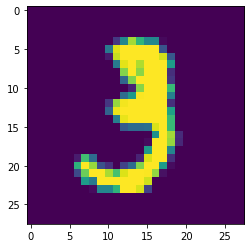

In [6]:
index = 10
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [7]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 254, 36.41326530612245)

In [9]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [10]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    
    

In [14]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [15]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [16]:
acc = accuracy(pred, test_y)
print(len(test_y))
print(acc)

10000
0.098


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(pred, test_y)

0.098

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [21]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [20]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.92
3 0.95
5 0.95
7 0.94
9 0.96


In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters=5)
km.fit(train_x_1[:10000])


KMeans(n_clusters=5)

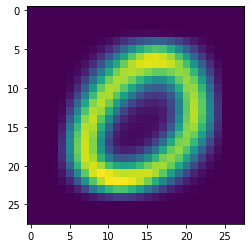

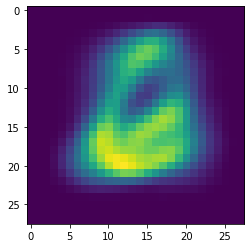

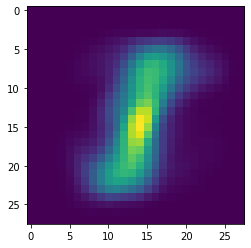

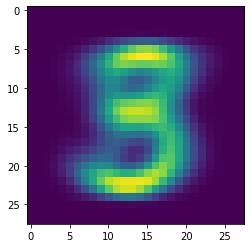

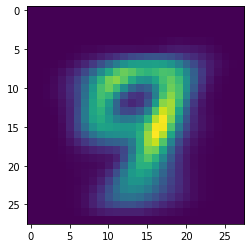

In [24]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2021sharebot c пометкой seminar03

### Решение задачи 1

In [25]:
# ваше решение задачи 1
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(train_x_1)
print(kf.split(train_x_1))


<generator object _BaseKFold.split at 0x0000022C63AA7740>


In [159]:
for train_index, test_index in kf.split(train_x_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_x_1[train_index], train_x_1[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]

TRAIN: [30000 30001 30002 ... 59997 59998 59999] TEST: [    0     1     2 ... 29997 29998 29999]
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [30000 30001 30002 ... 59997 59998 59999]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.942, 0.942, 0.951, 0.956, 0.953, 0.948, 0.947, 0.947, 0.94, 0.937, 0.936, 0.937, 0.931, 0.934, 0.928, 0.927, 0.925, 0.926, 0.927]
[0.942, 0.942, 0.951, 0.956, 0.953, 0.948, 0.947, 0.947, 0.94, 0.937, 0.936, 0.937, 0.931, 0.934, 0.928, 0.927, 0.925, 0.926, 0.927]
[0.942, 0.935, 0.95, 0.955, 0.949, 0.944, 0.945, 0.937, 0.937, 0.933, 0.933, 0.933, 0.932, 0.931, 0.927, 0.923, 0.923, 0.924, 0.924]


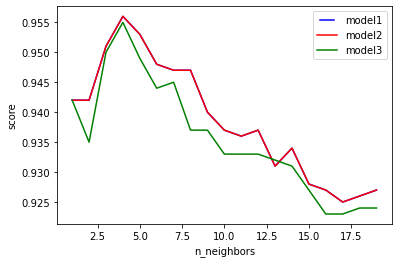

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
    
    
neighbors = list(range(1,20))
mod1 = []
mod2 = []
mod3 = []

for n in neighbors:
    print(n)
    model1 = KNeighborsClassifier(n_neighbors=n, weights='distance',algorithm='kd_tree')
    model2 = KNeighborsClassifier(n_neighbors=n, weights='distance',algorithm = 'ball_tree')
    model3 = KNeighborsClassifier(n_neighbors=n)
    
    model1.fit(X_train[:10000], y_train[:10000])
    y_pred = model1.predict(X_test[:1000])
    mod1.append(np.sum(y_test[:1000] == y_pred[:1000])/len(y_test[:1000])) # append(accuracy_score(y_pred[:100], test_y[:100]))
    
    model2.fit(X_train[:10000], y_train[:10000])
    y_pred = model2.predict(X_test[:1000])
    mod2.append(np.sum(y_test[:1000] == y_pred[:1000])/len(y_test[:1000]))  #append(accuracy_score(y_pred[:100], test_y[:100]))
    
    model3.fit(X_train[:10000], y_train[:10000])
    y_pred = model3.predict(X_test[:1000])
    mod3.append(np.sum(y_test[:1000] == y_pred[:1000])/len(y_test[:1000]))  #append(accuracy_score(y_pred[:100], test_y[:100]))
    
    
print(mod1)
print(mod2)
print(mod3)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, mod1, 'b', label='model1')
line2, = plt.plot(neighbors, mod2, 'r', label='model2')
line2, = plt.plot(neighbors, mod3, 'g', label='model3')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.show()

In [23]:
# сохраните параметры лучшего классификатора
model = KNeighborsClassifier(n_neighbors=4, weights='distance',algorithm='kd_tree')

with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(model.get_params(), f)



In [24]:
import pickle
with open('knn_best_params.pkl', 'rb') as f:
    data = pickle.load(f)
data

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'distance'}

### Решение задачи 2

In [146]:
# ваше решение задачи 2
list_num = []
for i in range(0,10):
    itemindex = np.where(y_train==i)
    new_1 = np.array(train_x)[itemindex] 
    new_1 = new_1.reshape(len(new_1), -1)
    km = KMeans(n_clusters=1)
    km.fit(new_1)
    list_num.append(km.cluster_centers_[0])
list_num = np.array(list_num)
print(list_num.shape)

(10, 784)


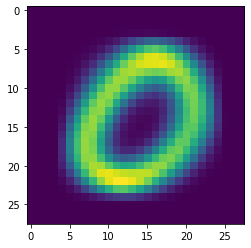

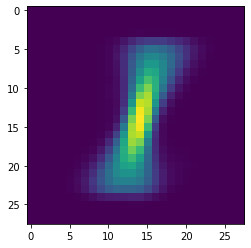

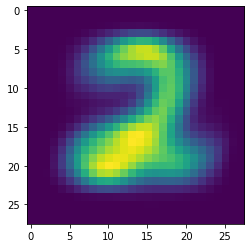

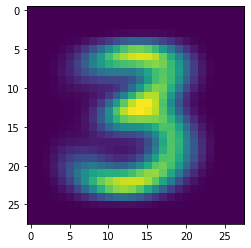

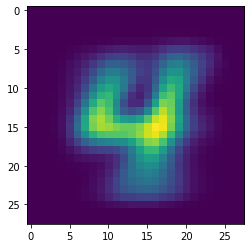

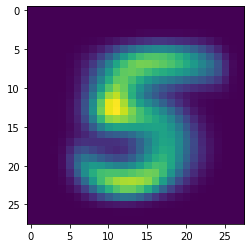

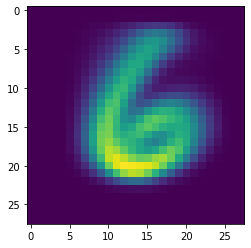

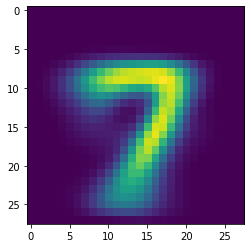

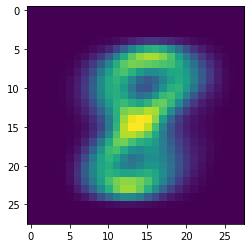

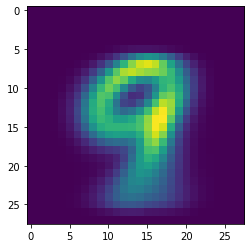

In [147]:
for cluster in list_num:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

In [148]:
model_with_et = KNeighborsClassifier(n_neighbors=1, weights='distance',algorithm='kd_tree')
model_with_et.fit(list_num, [0,1,2,3,4,5,6,7,8,9])
y_pred = model_with_et.predict(X_test)
print(np.sum(y_test == y_pred)/len(y_test))

0.8116333333333333


In [104]:
np.save('knn_10_best', list_num)

### Решение задачи 3

In [149]:
# ваше решение задачи 3
list_num = []
for i in range(0,10):
    itemindex = np.where(y_train==i)
    new_1 = np.array(train_x)[itemindex] 
    new_1 = new_1.reshape(len(new_1), -1)
    km = KMeans(n_clusters=6)
    km.fit(new_1)
    list_num.append(km.cluster_centers_[0])
    list_num.append(km.cluster_centers_[1])
    list_num.append(km.cluster_centers_[2])
    list_num.append(km.cluster_centers_[3])
    list_num.append(km.cluster_centers_[4])
    list_num.append(km.cluster_centers_[5])
list_num = np.array(list_num)
print(list_num.shape)

(60, 784)


In [150]:
model_with_et = KNeighborsClassifier(n_neighbors=1)
model_with_et.fit(list_num, [0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,9,9,9,9,9,9])
y_pred = model_with_et.predict(X_test)
print(np.sum(y_test == y_pred)/len(y_test))

0.9045666666666666
